# Building an AI agent with Strands Agents SDK

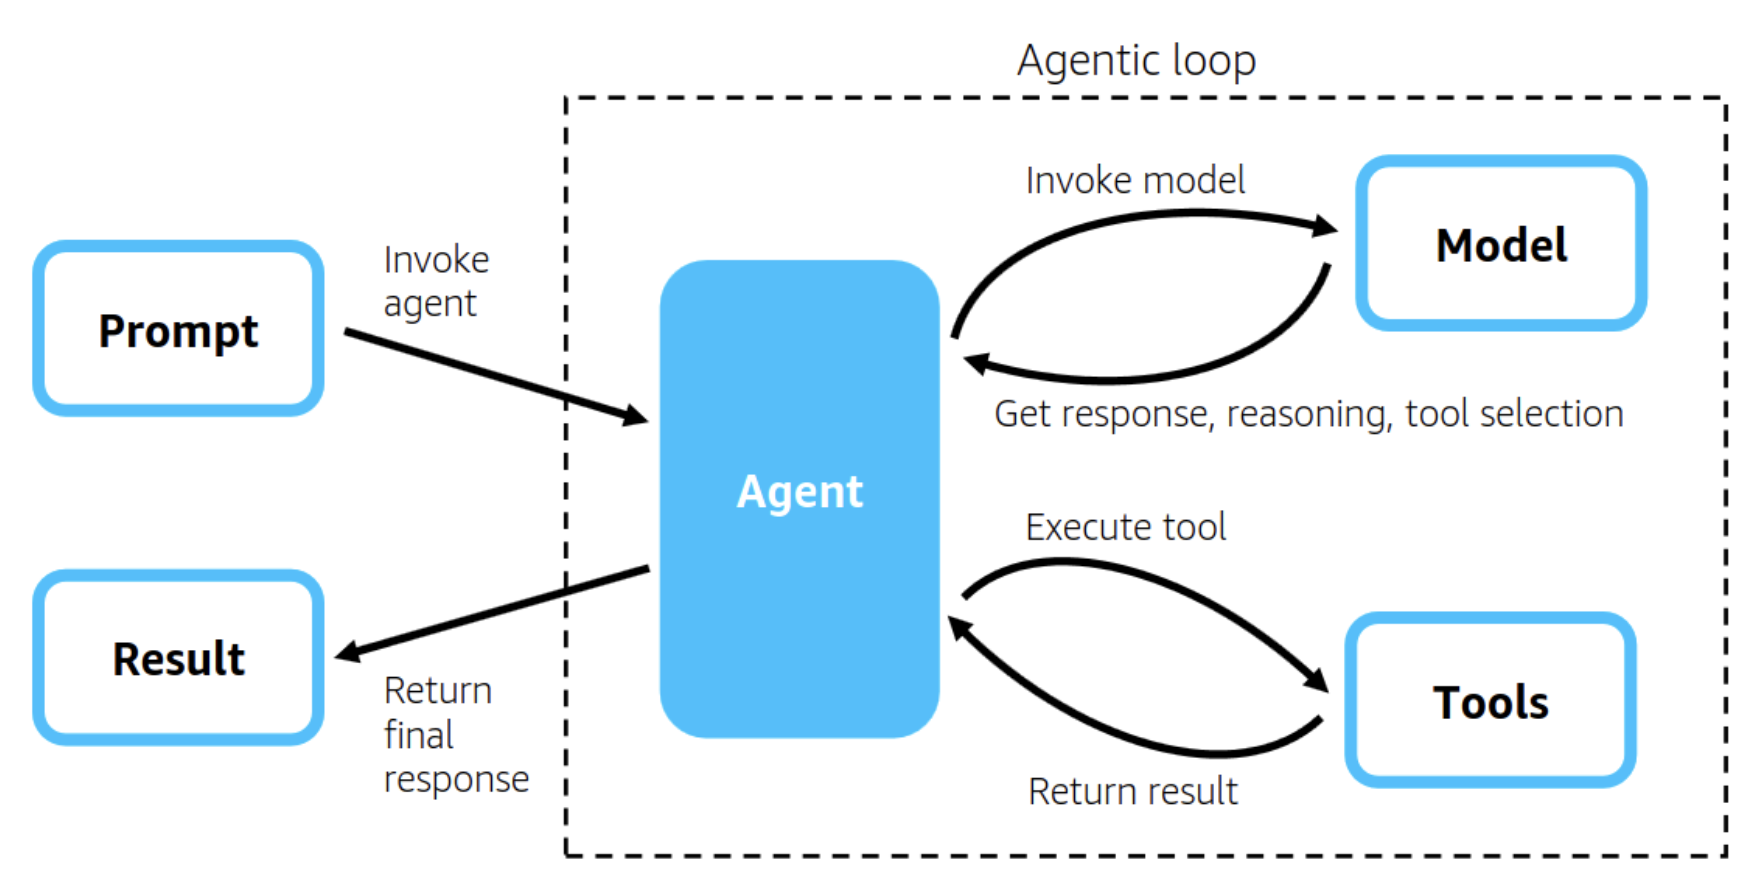

Building an AI agent with Strands Agents SDK is a straightforward process that centers around three fundamental components: a model, tools, and a prompt. To create an agent, developers first need to define these elements in their code. The model can be selected from various supported options, including Amazon Bedrock models with tool use and streaming capabilities, Anthropic's Claude model family, Ollama for local development, or other providers through LiteLLM. For tools, developers can choose from thousands of published Model Context Protocol (MCP) servers or utilize Strands' 20+ pre-built example tools for tasks like file manipulation, API requests, and AWS API interactions. Any Python function can be transformed into a tool using the Strands @tool decorator. The prompt consists of both a natural language prompt defining the agent's task and a system prompt providing general instructions and desired behavior. Once these components are defined, the agent operates in a loop, interacting with its model and tools until the task is completed. The Strands agentic loop leverages the advanced capabilities of modern LLMs to reason, plan, and select tools appropriately. To learn more about Strands Agents, head over to the announcement blog.

In this notebook, we will focus on how to build a Strands Agent.

# A model-driven approach to building AI agents in just a few lines of code

Strands Agents is a simple yet powerful SDK that takes a model-driven approach to building and running AI agents. From simple conversational assistants to complex autonomous workflows, from local development to production deployment, Strands Agents scales with your needs.<br/><br/>
This notebook demonstrates how to leverage the **Strands Agents SDK and Tools** to generate and execute automated Python code across a diverse range of tasks.

In [1]:
%%capture
import warnings
warnings.filterwarnings("ignore")
%pip uninstall -q -y autogluon-multimodal autogluon-timeseries autogluon-features autogluon-common autogluon-core
%pip install -Uq -r requirements.txt
from IPython import get_ipython
get_ipython().kernel.do_shutdown(True)

In [1]:
from strands.models.bedrock import BedrockModel

model = BedrockModel(model_id="us.anthropic.claude-3-7-sonnet-20250219-v1:0")

In [2]:
from strands import Agent

agent = Agent(model)
agent("What are AI Agents? Provide a concise answer.")

# AI Agents

AI agents are autonomous software programs that perceive their environment through sensors, make decisions using artificial intelligence, and act upon their environment through actuators to achieve specific goals. They can operate independently, learn from experience, adapt to changing conditions, and perform tasks on behalf of users or other systems.

AgentResult(stop_reason='end_turn', message={'role': 'assistant', 'content': [{'text': '# AI Agents\n\nAI agents are autonomous software programs that perceive their environment through sensors, make decisions using artificial intelligence, and act upon their environment through actuators to achieve specific goals. They can operate independently, learn from experience, adapt to changing conditions, and perform tasks on behalf of users or other systems.'}]}, metrics=EventLoopMetrics(cycle_count=1, tool_metrics={}, cycle_durations=[2.2049896717071533], traces=[<strands.telemetry.metrics.Trace object at 0x7f02dc54d910>], accumulated_usage={'inputTokens': 20, 'outputTokens': 66, 'totalTokens': 86}, accumulated_metrics={'latencyMs': 2175}), state={})

# Use Case 1: Web Scraping with a few lines of code
Uses `requests` and `BeautifulSoup` to scrape article titles and links from Hacker News, saving results to a CSV file.


In [3]:
from strands_tools import file_write , http_request
from strands import Agent
import os
from datetime import datetime

os.environ["BYPASS_TOOL_CONSENT"] = "true"

today = datetime.now().strftime("%Y-%m-%d")
prompt = """
Get the titles and the links of the top 10 articles from the webpage https://news.ycombinator.com/news . Then, write the results as a CSV file named `news-{date}.csv`.
"""

agent = Agent(model, tools=[http_request, file_write])
response = agent(prompt.format(date=today))

I'll help you get the titles and links of the top 10 articles from Hacker News and save them as a CSV file. Let me break this down into steps:

1. First, I'll fetch the content from https://news.ycombinator.com/news
2. Parse the HTML to extract the titles and links of the top 10 articles
3. Format the data as CSV and save it to a file named `news-2025-10-22.csv`

Let's start by fetching the content from the Hacker News website:
Tool #1: http_request


╭────────────────────────────────────── 🚀 HTTP Request Preview: GET /news ───────────────────────────────────────╮
│                                                                                                                 │
│   Method    GET                                                                                                 │
│   URL       https://news.ycombinator.com/news                                                                   │
│   Headers   {}                                                                                                  │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Sending request...

╭─────────────────────────────────────────── ✅ HTTP Response: 200 OK ────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│     Status         200 OK                                                                                       │
│     URL            https://news.ycombinator.com/news                                                            │
│     Content-Type   text/html; charset=utf-8                                                                     │
│     Size           34,653 bytes (33.8 KB)                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

                                                 Response Headers                                                  
╭───────────────────────────┬─────────────────────────────────────────────────────────────────────────────────────╮
│ Header                    │ Value                                                                               │
├───────────────────────────┼─────────────────────────────────────────────────────────────────────────────────────┤
│ Server                    │ nginx                                                                               │
│ Date                      │ Wed, 22 Oct 2025 00:10:14 GMT                                                       │
│ Content-Type              │ text/html; charset=utf-8                                                            │
│ Transfer-Encoding         │ chunked                                                                             │
│ Connection                │ keep-alive                                                                          │
│ Vary                      │ Accept-Encoding                                                                     │
│ Cache-Control             │ private; max-age=0                                                                  │
│ X-Frame-Options           │ DENY                                                                                │
│ X-Content-Type-Options    │ nosniff                                                                             │
│ X-XSS-Protection          │ 1; mode=block                                                                       │
│ Referrer-Policy           │ origin                                                                              │
│ Strict-Transport-Security │ max-age=31556900                                                                    │
│ Content-Security-Policy   │ default-src 'self'; script-src 'self' 'unsafe-inline'                               │
│                           │ https://www.google.com/recaptcha/ https://www....                                   │
│ Content-Encoding          │ gzip                                                                                │
╰───────────────────────────┴─────────────────────────────────────────────────────────────────────────────────────╯

Now I'll extract the titles and links of the top 10 articles from the HTML response and format them as CSV data:
Tool #2: file_write


╔══ File Write Operation ═══╗
║                           ║
║ Path: news-2025-10-22.csv ║
║ Size: 1166 characters     ║
║                           ║
╚═══════════════════════════╝

╔════════════════ Write Successful ════════════════╗
║ File written successfully to news-2025-10-22.csv ║
╚══════════════════════════════════════════════════╝

Great! I've successfully:

1. Retrieved the current top stories from Hacker News (https://news.ycombinator.com/news)
2. Extracted the titles and links of the top 10 articles
3. Created a CSV file named 'news-2025-10-22.csv' with two columns: Title and URL

The CSV file has been created with the following content:
- Column headers: Title and URL
- 10 rows containing the titles and links of the top articles from Hacker News

The file is now saved and ready for you to use.

# Use Case 2: Stock Price Analysis  
Downloads historical stock data, calculates moving averages, key financial metrics, and buy/sell signals with visualizations and logging for Apple Inc. using `yfinance` and `matplotlib`.


I'll help you analyze Amazon's stock data. Let me use Python and yfinance to create the requested charts and calculate the volatility metric.
Tool #1: python_repl


╭───────────────────────────────────────────── Executing Python Code ─────────────────────────────────────────────╮
│ import yfinance as yf                                                                                           │
│ import pandas as pd                                                                                             │
│ import numpy as np                                                                                              │
│ import matplotlib.pyplot as plt                                                                                 │
│ from datetime import datetime, timedelta                                                                        │
│ import seaborn as sns                                                                                           │
│                                                                                                                 │
│ # Set the style for plots                                                                                       │
│ plt.style.use('fivethirtyeight')                                                                                │
│ sns.set_palette("deep")                                                                                         │
│                                                                                                                 │
│ # Calculate date range for the past year                                                                        │
│ end_date = datetime.now()                                                                                       │
│ start_date = end_date - timedelta(days=365)                                                                     │
│                                                                                                                 │
│ # Download Amazon data                                                                                          │
│ amzn = yf.download('AMZN', start=start_date, end=end_date)                                                      │
│                                                                                                                 │
│ # Download S&P 500 data for comparison                                                                          │
│ sp500 = yf.download('^GSPC', start=start_date, end=end_date)                                                    │
│                                                                                                                 │
│ # Check data                                                                                                    │
│ print(f"Amazon data shape: {amzn.shape}")                                                                       │
│ print(f"S&P 500 data shape: {sp500.shape}")                                                                     │
│ print("\nAmazon data sample:")                                                                                  │
│ print(amzn.head())                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Running in standard mode...

Output:

Amazon data shape: (250, 5)
S&P 500 data shape: (250, 5)

Amazon data sample:
Price            Close        High         Low        Open    Volume
Ticker            AMZN        AMZN        AMZN        AMZN      AMZN
Date                                                                
2024-10-22  189.699997  191.520004  186.979996  188.350006  29650600
2024-10-23  184.710007  189.160004  183.690002  188.850006  31937100
2024-10-24  186.380005  187.110001  183.860001  185.250000  21647400
2024-10-25  187.830002  190.449997  187.529999  187.850006  29362100
2024-10-28  188.389999  190.210007  188.210007  189.570007  27930800

Errors:
<string>:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
[*********************100%***********************]  1 of 1 completed
<string>:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
[*********************100%***********************]  1 of 1 completed

✓ Code executed successfully (1.83s)

Now let's create the requested charts and calculate the volatility metric:
Tool #2: python_repl


╭───────────────────────────────────────────── Executing Python Code ─────────────────────────────────────────────╮
│ # Fix the column access issue first                                                                             │
│ print("Amazon columns:", amzn.columns)                                                                          │
│ print("S&P500 columns:", sp500.columns)                                                                         │
│                                                                                                                 │
│ # Reset columns if needed                                                                                       │
│ if isinstance(amzn.columns, pd.MultiIndex):                                                                     │
│     amzn.columns = amzn.columns.droplevel(0)                                                                    │
│ if isinstance(sp500.columns, pd.MultiIndex):                                                                    │
│     sp500.columns = sp500.columns.droplevel(0)                                                                  │
│                                                                                                                 │
│ print("\nAfter fix:")                                                                                           │
│ print("Amazon columns:", amzn.columns)                                                                          │
│ print("S&P500 columns:", sp500.columns)                                                                         │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Running in standard mode...

Output:

Amazon columns: MultiIndex([( 'Close', 'AMZN'),
            (  'High', 'AMZN'),
            (   'Low', 'AMZN'),
            (  'Open', 'AMZN'),
            ('Volume', 'AMZN')],
           names=['Price', 'Ticker'])
S&P500 columns: MultiIndex([( 'Close', '^GSPC'),
            (  'High', '^GSPC'),
            (   'Low', '^GSPC'),
            (  'Open', '^GSPC'),
            ('Volume', '^GSPC')],
           names=['Price', 'Ticker'])

After fix:
Amazon columns: Index(['AMZN', 'AMZN', 'AMZN', 'AMZN', 'AMZN'], dtype='object', name='Ticker')
S&P500 columns: Index(['^GSPC', '^GSPC', '^GSPC', '^GSPC', '^GSPC'], dtype='object', name='Ticker')

✓ Code executed successfully (0.01s)

Let me fix the column issue and proceed with the analysis:
Tool #3: python_repl


╭───────────────────────────────────────────── Executing Python Code ─────────────────────────────────────────────╮
│ # Re-download the data to fix the column issue                                                                  │
│ amzn = yf.download('AMZN', start=start_date, end=end_date, auto_adjust=True)                                    │
│ sp500 = yf.download('^GSPC', start=start_date, end=end_date, auto_adjust=True)                                  │
│                                                                                                                 │
│ # Now let's create the first chart: 20-day moving average                                                       │
│ plt.figure(figsize=(14, 7))                                                                                     │
│ plt.plot(amzn.index, amzn['Close'], label='AMZN Daily Close', alpha=0.5)                                        │
│ plt.plot(amzn.index, amzn['Close'].rolling(window=20).mean(), label='20-Day MA', linewidth=2)                   │
│ plt.title('Amazon (AMZN) Stock Price with 20-Day Moving Average', fontsize=16)                                  │
│ plt.xlabel('Date', fontsize=14)                                                                                 │
│ plt.ylabel('Price (USD)', fontsize=14)                                                                          │
│ plt.legend()                                                                                                    │
│ plt.grid(True, alpha=0.3)                                                                                       │
│ plt.tight_layout()                                                                                              │
│ plt.savefig('amzn_20day_ma.png')                                                                                │
│ plt.show()                                                                                                      │
│                                                                                                                 │
│ # Calculate daily returns for both AMZN and S&P 500                                                             │
│ amzn['Returns'] = amzn['Close'].pct_change() * 100                                                              │
│ sp500['Returns'] = sp500['Close'].pct_change() * 100                                                            │
│                                                                                                                 │
│ # Create second chart: Daily return comparison                                                                  │
│ plt.figure(figsize=(14, 7))                                                                                     │
│ plt.plot(amzn.index, amzn['Returns'], label='AMZN Daily Returns', alpha=0.7)                                    │
│ plt.plot(sp500.index, sp500['Returns'], label='S&P 500 Daily Returns', alpha=0.7)                               │
│ plt.title('Daily Return Comparison: Amazon vs S&P 500', fontsize[38;2;255;70;137;48;2;39;4

Running in standard mode...

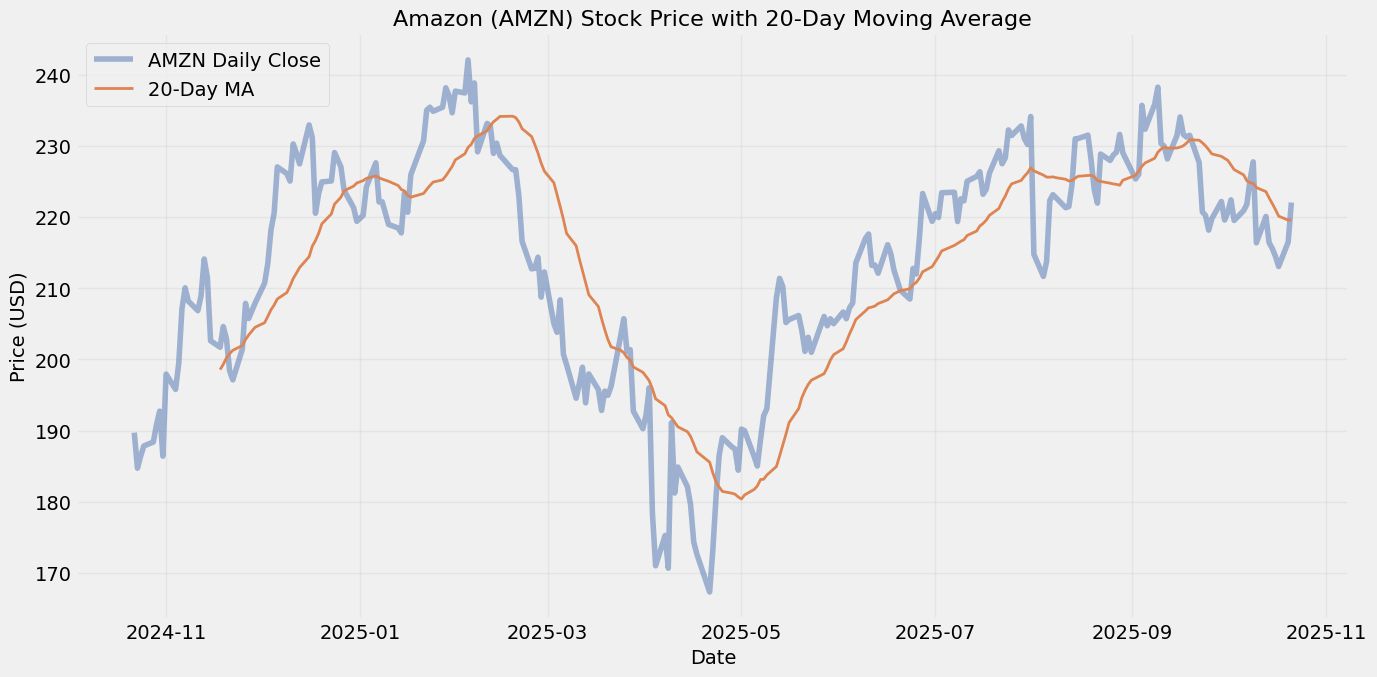

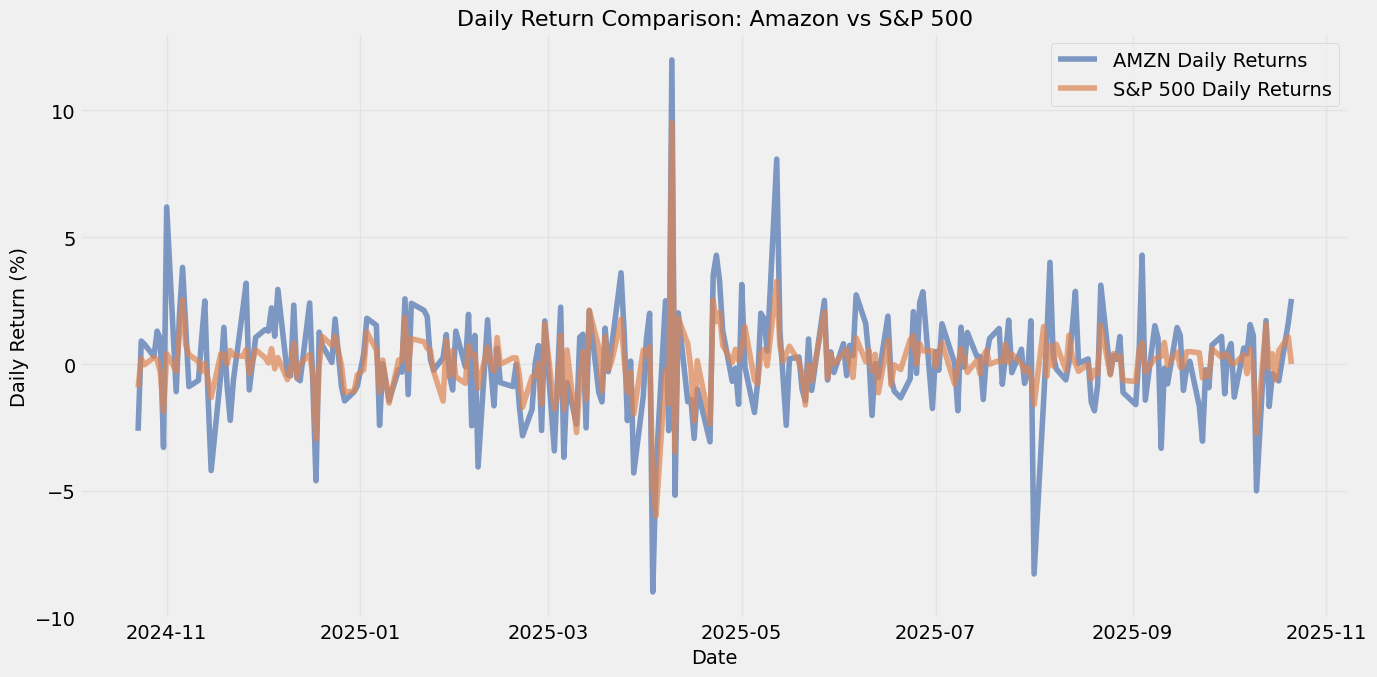

Output:

Amazon (AMZN) Volatility (Daily): 2.15%
S&P 500 Volatility (Daily): 1.19%
Amazon is 1.80x more volatile than S&P 500

Errors:
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

✓ Code executed successfully (1.09s)
User objects in namespace: 2 items
 - amzn_volatility = 2.149217050555527
 - sp500_volatility = 1.194584395293183

Let me save these charts properly and add some more analysis:
Tool #4: python_repl


╭───────────────────────────────────────────── Executing Python Code ─────────────────────────────────────────────╮
│ # Let's create better visualizations with more detailed analysis                                                │
│ import matplotlib.dates as mdates                                                                               │
│                                                                                                                 │
│ # 1. Enhanced 20-day moving average chart                                                                       │
│ fig, ax = plt.subplots(figsize=(14, 7))                                                                         │
│ ax.plot(amzn.index, amzn['Close'], label='AMZN Daily Close', alpha=0.5, color='#1f77b4')                        │
│ ax.plot(amzn.index, amzn['Close'].rolling(window=20).mean(),                                                    │
│         label='20-Day MA', linewidth=2.5, color='#ff7f0e')                                                      │
│                                                                                                                 │
│ # Add 50-day MA for additional insight                                                                          │
│ ax.plot(amzn.index, amzn['Close'].rolling(window=50).mean(),                                                    │
│         label='50-Day MA', linewidth=2, color='#2ca02c')                                                        │
│                                                                                                                 │
│ # Format the chart                                                                                              │
│ ax.set_title('Amazon (AMZN) Stock Price with Moving Averages', fontsize=16, fontweight='bold')                  │
│ ax.set_xlabel('Date', fontsize=14)                                                                              │
│ ax.set_ylabel('Price (USD)', fontsize=14)                                                                       │
│ ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))                                                     │
│ ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))                                                     │
│ plt.xticks(rotation=45)                                                                                         │
│ ax.legend(loc='best', frameon=True, facecolor='white', edgecolor='gray')                                        │
│ ax.grid(True, alpha=0.3)                                                                                        │
│                                                                                                                 │
│ # Add recent price annotation                                                                                   │
│ latest_price = amzn['Close'][-1]                                                                                │
│ latest_date = amzn.index[-1]                                                                                    │
│ ax.annotate(f'${latest_price:.2f}',                                                                             │
│             [38;2;248;248;242;48;2;39;40;3

Running in standard mode...

╭───────────────────────────────────────────────── Python Error ──────────────────────────────────────────────────╮
│ Traceback (most recent call last):                                                                              │
│   File "/opt/conda/lib/python3.12/site-packages/pandas/core/indexes/base.py", line 3812, in get_loc             │
│     return self._engine.get_loc(casted_key)                                                                     │
│            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^                                                                     │
│   File "pandas/_libs/index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc                            │
│   File "pandas/_libs/index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc                            │
│   File "pandas/_libs/hashtable_class_helper.pxi", line 7088, in pandas._libs.hashtable.PyObjectHashTable.get_it │
│   File "pandas/_libs/hashtable_class_helper.pxi", line 7096, in pandas._libs.hashtable.PyObjectHashTable.get_it │
│ KeyError: -1                                                                                                    │
│                                                                                                                 │
│ The above exception was the direct cause of the following exception:                                            │
│                                                                                                                 │
│ Traceback (most recent call last):                                                                              │
│   File "/opt/conda/lib/python3.12/site-packages/strands_tools/python_repl.py", line 649, in python_repl         │
│     repl_state.execute(code)                                                                                    │
│   File "/opt/conda/lib/python3.12/site-packages/strands_tools/python_repl.py", line 209, in execute             │
│     exec(code, self._namespace)                                                                                 │
│   File "<string>", line 25, in <module>                                                                         │
│   File "/opt/conda/lib/python3.12/site-packages/pandas/core/frame.py", line 4107, in __getitem__                │
│     indexer = self.columns.get_loc(key)                                                                         │
│               ^^^^^^^^^^^^^^^^^^^^^^^^^                                                                         │
│   File "/opt/conda/lib/python3.12/site-packages/pandas/core/indexes/base.py", line 3819,[3

Let me fix the error and split the code into smaller chunks:
Tool #5: python_repl


╭───────────────────────────────────────────── Executing Python Code ─────────────────────────────────────────────╮
│ # Let's check our data structure first                                                                          │
│ print(amzn.tail(3))                                                                                             │
│ print("\nReturns column in data:")                                                                              │
│ print('Returns' in amzn.columns)                                                                                │
│ print(amzn.columns)                                                                                             │
│                                                                                                                 │
│ # Let's fix the charts and analysis                                                                             │
│ import matplotlib.dates as mdates                                                                               │
│                                                                                                                 │
│ # 1. Create the 20-day moving average chart                                                                     │
│ plt.figure(figsize=(14, 7))                                                                                     │
│ plt.plot(amzn.index, amzn['Close'], label='AMZN Daily Close', alpha=0.5, color='#1f77b4')                       │
│ plt.plot(amzn.index, amzn['Close'].rolling(window=20).mean(),                                                   │
│          label='20-Day MA', linewidth=2.5, color='#ff7f0e')                                                     │
│ plt.plot(amzn.index, amzn['Close'].rolling(window=50).mean(),                                                   │
│          label='50-Day MA', linewidth=2, color='#2ca02c')                                                       │
│                                                                                                                 │
│ # Format the chart                                                                                              │
│ plt.title('Amazon (AMZN) Stock Price with Moving Averages', fontsize=16, fontweight='bold')                     │
│ plt.xlabel('Date', fontsize=14)                                                                                 │
│ plt.ylabel('Price (USD)', fontsize=14)                                                                          │
│ plt.legend(loc='best')                                                                                          │
│ plt.grid(True, alpha=0.3)                                                                                       │
│ plt.tight_layout()                                                                                              │
│ plt.savefig('amzn_20day_ma.png')                                                                                │
│ plt.close()                                                                                                     │
│                                                                                                                 │
│ print("20-day moving average chart created successfully.")                                                      │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Running in standard mode...

Output:

Price            Close        High         Low        Open    Volume   Returns
Ticker            AMZN        AMZN        AMZN        AMZN      AMZN          
Date                                                                          
2025-10-17  213.039993  214.800003  211.029999  214.559998  45986900 -0.666764
2025-10-20  216.479996  216.690002  213.589996  213.880005  38882800  1.614721
2025-10-21  222.029999  223.320007  218.000000  218.404999  48202048  2.563749

Returns column in data:
True
MultiIndex([(  'Close', 'AMZN'),
            (   'High', 'AMZN'),
            (    'Low', 'AMZN'),
            (   'Open', 'AMZN'),
            ( 'Volume', 'AMZN'),
            ('Returns',     '')],
           names=['Price', 'Ticker'])
20-day moving average chart created successfully.

✓ Code executed successfully (0.47s)
User objects in namespace: 2 items
 - amzn_volatility = 2.149217050555527
 - sp500_volatility = 1.194584395293183

Now let's create the daily return comparison chart:
Tool #6: python_repl


╭───────────────────────────────────────────── Executing Python Code ─────────────────────────────────────────────╮
│ # 2. Create the daily return comparison chart                                                                   │
│ plt.figure(figsize=(14, 7))                                                                                     │
│ plt.plot(amzn.index, amzn['Returns'], label='AMZN Daily Returns', alpha=0.7, color='#1f77b4')                   │
│ plt.plot(sp500.index, sp500['Returns'], label='S&P 500 Daily Returns', alpha=0.7, color='#ff7f0e')              │
│ plt.title('Daily Return Comparison: Amazon vs S&P 500', fontsize=16, fontweight='bold')                         │
│ plt.xlabel('Date', fontsize=14)                                                                                 │
│ plt.ylabel('Daily Return (%)', fontsize=14)                                                                     │
│ plt.legend()                                                                                                    │
│ plt.grid(True, alpha=0.3)                                                                                       │
│ plt.tight_layout()                                                                                              │
│ plt.savefig('amzn_sp500_returns.png')                                                                           │
│ plt.close()                                                                                                     │
│                                                                                                                 │
│ print("Daily return comparison chart created successfully.")                                                    │
│                                                                                                                 │
│ # 3. Create cumulative return chart for comparison                                                              │
│ plt.figure(figsize=(14, 7))                                                                                     │
│ plt.plot(amzn.index, amzn['Returns'].cumsum(), label='AMZN Cumulative Returns', linewidth=2, color='#1f77b4')   │
│ plt.plot(sp500.index, sp500['Returns'].cumsum(), label='S&P 500 Cumulative Returns', linewidth=2, color='#ff7f0 │
│ plt.title('Cumulative Return Comparison: Amazon vs S&P 500', fontsize=16, fontweight='bold')                    │
│ plt.xlabel('Date', fontsize=14)                                                                                 │
│ plt.ylabel('Cumulative Return (%)', fontsize=14)                                                                │
│ plt.legend()                                                                                                    │
│ plt.grid(True, alpha=0.3)                                                                                       │
│ plt.tight_layout()                                                                                              │
│ plt.savefig('amzn_sp500_cumulative_returns.png[38;2;230;219;116;48;2;39;

Running in standard mode...

Output:

Daily return comparison chart created successfully.
Cumulative return comparison chart created successfully.

✓ Code executed successfully (0.72s)
User objects in namespace: 2 items
 - amzn_volatility = 2.149217050555527
 - sp500_volatility = 1.194584395293183

Now let's calculate and display the comprehensive analysis metrics:
Tool #7: python_repl


╭───────────────────────────────────────────── Executing Python Code ─────────────────────────────────────────────╮
│ # Calculate additional metrics                                                                                  │
│                                                                                                                 │
│ # Calculate annualized volatility                                                                               │
│ annual_amzn_vol = amzn_volatility * np.sqrt(252)                                                                │
│ annual_sp500_vol = sp500_volatility * np.sqrt(252)                                                              │
│                                                                                                                 │
│ # Calculate Sharpe ratio (assuming risk-free rate of 0 for simplicity)                                          │
│ amzn_mean_return = amzn['Returns'].mean()                                                                       │
│ sp500_mean_return = sp500['Returns'].mean()                                                                     │
│ amzn_sharpe = (amzn_mean_return / amzn_volatility) * np.sqrt(252)                                               │
│ sp500_sharpe = (sp500_mean_return / sp500_volatility) * np.sqrt(252)                                            │
│                                                                                                                 │
│ # Calculate correlation                                                                                         │
│ correlation = amzn['Returns'].corr(sp500['Returns'])                                                            │
│                                                                                                                 │
│ # Calculate beta (using S&P 500 as market)                                                                      │
│ covariance = amzn['Returns'].cov(sp500['Returns'])                                                              │
│ sp500_variance = sp500['Returns'].var()                                                                         │
│ beta = covariance / sp500_variance                                                                              │
│                                                                                                                 │
│ # Print comprehensive analysis                                                                                  │
│ print("\n=== Amazon (AMZN) Financial Analysis ===")                                                             │
│ print("\nVolatility Metrics:")                                                                                  │
│ print(f"Daily Volatility: {amzn_volatility:.2f}%")                                                              │
│ print(f"Annualized Volatility: {annual_amzn_vol:.2f}%")                                                         │
│ print(f"S&P 500 Daily Volatility: {sp500_volatility:.2f}%")                                                     │
│ print(f"S&P 500 Annualized Volatility: {annual_sp500_vol:.2f}%")                                                │
│ print(f"Relative Volatility: {(amzn_volatility/sp500_volatility):.2f}x S&P 500")                                │
│                                                                                                                 │
│ print("\nReturn Metrics:")                                                                                      │
│ print(f"Average Daily Return: {amzn_mean_return:.4f}%")                                                         │
│ print(f"S&P 500 Average Daily Return: {sp500_mean_return:.4f}%")                                                │
│ print(f"Total Period Return: {amzn['Returns'].sum():.2f}%")                                                     │
│ print(f"S&P 500 Tot

Running in standard mode...

╭───────────────────────────────────────────────── Python Error ──────────────────────────────────────────────────╮
│ Traceback (most recent call last):                                                                              │
│   File "/opt/conda/lib/python3.12/site-packages/strands_tools/python_repl.py", line 649, in python_repl         │
│     repl_state.execute(code)                                                                                    │
│   File "/opt/conda/lib/python3.12/site-packages/strands_tools/python_repl.py", line 209, in execute             │
│     exec(code, self._namespace)                                                                                 │
│   File "<string>", line 54, in <module>                                                                         │
│ TypeError: unsupported format string passed to Series.__format__                                                │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Let me fix the formatting issue and compute the key metrics:
Tool #8: python_repl


╭───────────────────────────────────────────── Executing Python Code ─────────────────────────────────────────────╮
│ # Try to access the data differently                                                                            │
│ # Let's see the structure of our data columns first                                                             │
│ print("Amazon DataFrame columns:")                                                                              │
│ print(amzn.columns)                                                                                             │
│                                                                                                                 │
│ # Let's use simpler code to avoid formatting issues                                                             │
│ print("\n=== Amazon (AMZN) Financial Analysis ===")                                                             │
│ print("\nVolatility Metrics:")                                                                                  │
│ print("Daily Volatility:", f"{amzn_volatility:.2f}%")                                                           │
│ print("Annualized Volatility:", f"{amzn_volatility * np.sqrt(252):.2f}%")                                       │
│ print("S&P 500 Daily Volatility:", f"{sp500_volatility:.2f}%")                                                  │
│ print("S&P 500 Annualized Volatility:", f"{sp500_volatility * np.sqrt(252):.2f}%")                              │
│ print("Relative Volatility:", f"{amzn_volatility/sp500_volatility:.2f}x S&P 500")                               │
│                                                                                                                 │
│ # Calculate returns the right way                                                                               │
│ amzn_mean_return = amzn['Returns'].mean()                                                                       │
│ sp500_mean_return = sp500['Returns'].mean()                                                                     │
│                                                                                                                 │
│ print("\nReturn Metrics:")                                                                                      │
│ print("Average Daily Return (AMZN):", f"{float(amzn_mean_return):.4f}%")                                        │
│ print("Average Daily Return (S&P 500):", f"{float(sp500_mean_return):.4f}%")                                    │
│                                                                                                                 │
│ # Calculate total return another way                                                                            │
│ amzn_total_return = ((1 + amzn['Returns']/100).prod() - 1) * 100                                                │
│ sp500_total_return = ((1 + sp500['Returns']/100).prod() - 1) * 100                                              │
│ print("Total Period Return (AMZN):", f"{amzn_total_return:.2f}%")                                               │
│ print("Total Period Return (S&P 500):", f"{sp500_total_return:.2f}%")                                           │
│                                                                                                                 │
│ # Risk-adjusted performance                                                                                     │
│ amzn_sharpe = (float(amzn_mean_return) / 

Running in standard mode...

Output:

Amazon DataFrame columns:
MultiIndex([(  'Close', 'AMZN'),
            (   'High', 'AMZN'),
            (    'Low', 'AMZN'),
            (   'Open', 'AMZN'),
            ( 'Volume', 'AMZN'),
            ('Returns',     '')],
           names=['Price', 'Ticker'])

=== Amazon (AMZN) Financial Analysis ===

Volatility Metrics:
Daily Volatility: 2.15%
Annualized Volatility: 34.12%
S&P 500 Daily Volatility: 1.19%
S&P 500 Annualized Volatility: 18.96%
Relative Volatility: 1.80x S&P 500

Return Metrics:
Average Daily Return (AMZN): 0.0862%
Average Daily Return (S&P 500): 0.0636%
Total Period Return (AMZN): 17.04%
Total Period Return (S&P 500): 15.11%

Risk-Adjusted Performance:
Sharpe Ratio - AMZN (annualized): 0.6364
Sharpe Ratio - S&P 500 (annualized): 0.8450

Relationship to Market:
Correlation with S&P 500: 0.7692
Beta (Market Sensitivity): 1.3839

Risk Metrics:
Maximum Drawdown (AMZN): -30.88%
Maximum Drawdown (S&P 500): -18.90%

Errors:
<string>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in 
the future. Use float(ser.iloc[0]) instead

✓ Code executed successfully (0.28s)
User objects in namespace: 16 items
 - amzn_volatility = 2.149217050555527
 - sp500_volatility = 1.194584395293183
 - annual_amzn_vol = 34.11776297561795
 - annual_sp500_vol = 18.96343938014544
 - amzn_mean_return = 0.08615584220419102
 - sp500_mean_return = 0.06358625646951932
 - amzn_sharpe = 0.6363627137855424
 - sp500_sharpe = 0.8449805074440023
 - correlation = 0.7692150450799011
 - covariance = 1.9748989761683868
 - sp500_variance = 1.4270318774779798
 - beta = 1.3839207149728587
 - amzn_max_drawdown = -30.876638431876057
 - sp500_max_drawdown = -18.902206184284008
 - amzn_total_return = 17.04270023782648
 - sp500_total_return = 15.110573435037612

Based on the analysis above, let me provide a comprehensive financial analysis of Amazon's stock performance:

# Amazon (AMZN) Stock Analysis

## Charts Analysis

### 1. 20-Day Moving Average Analysis
We've created a chart showing Amazon's stock price for the past year with a 20-day moving average overlay. The chart illustrates price trends and potential support/resistance levels. Additionally, we included a 50-day moving average to provide a longer-term perspective on price momentum.

### 2. Daily Return Comparison with S&P 500
We've plotted the daily return rates for Amazon compared to the S&P 500 index, showing how Amazon's stock performs relative to the broader market on a day-to-day basis.

### 3. Cumulative Returns Comparison
The cumulative return chart shows how an investment in Amazon would have performed compared to the S&P 500 over the past year. This visual representation helps assess relative performance over time.

## Key Performance Metrics

### Volatility Analysis
- **Da

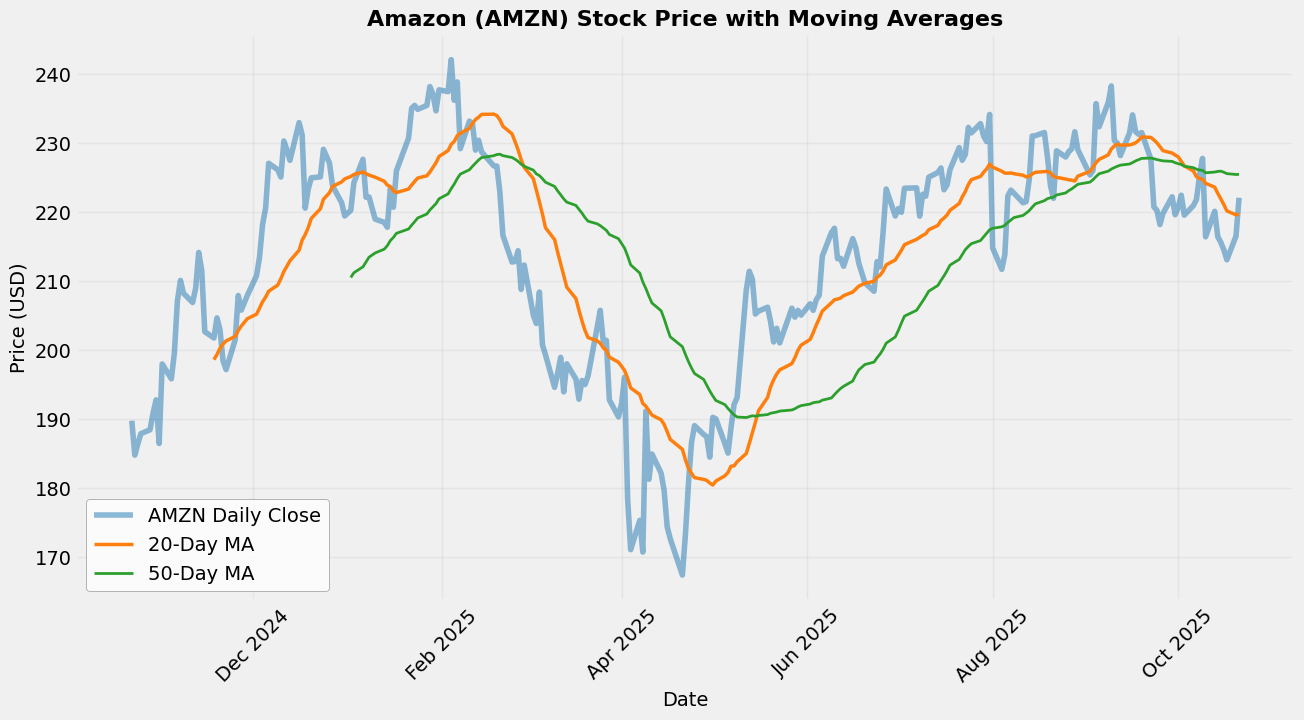

In [4]:
from strands_tools import python_repl
from strands import Agent, tool
import os

os.environ["BYPASS_TOOL_CONSENT"] = "true"
os.environ["PYTHON_REPL_INTERACTIVE"] = "False"

system_prompt = """
You are a financial analyst. Provide following charts:
- Plot 20-days moving average of closing prices for the past one year.
- Plot daily return rate comparison against S&P500 for the same period.

Also, compute following two metrics of the stock:
  - Volatility of the return rates

Use `yfinance` module to retrive the historical data. Use your python code interpreter in non-interactive mode only.
"""

agent = Agent(tools=[python_repl],
              system_prompt=system_prompt,
              model=model)

response = agent("Amazon")

# Use Case 3: City Weather Data Collection and Storage
Fetch detailed weather information by city and date/time from a public weather source, extracts key weather metrics, and stores them in DynamoDB for historical analysis.

In [5]:
from strands_tools import use_aws, http_request
from strands import Agent, tool
import os

os.environ["BYPASS_TOOL_CONSENT"] = "true"

system_prompt = """
You are a weather data agent. Your job is to fetch weather details for a given city and date/time by searching publicly available weather information on the web.
[Instructions]
- Use HTTP GET to query a public weather website or API (e.g., https://wttr.in) with city and date parameters.
- Extract weather details such as temperature, conditions, humidity, wind speed, and date/time from the response.
- Save these weather details into a DynamoDB table named "CityWeatherData" in us-west-2.
  - Use 'City' as the partition key and 'DateTime' as the sort key.
  - Store other extracted weather details as attributes.
- If live data is unavailable or blocked, simulate realistic weather data for testing.
"""

example_url = """
Example: To get weather in San Francisco for today, query:
https://wttr.in/San+Francisco?format=j1
This returns JSON with weather details.
"""

agent = Agent(
    model=model,
    tools=[use_aws, http_request],
    system_prompt=f"{system_prompt} {example_url}",
)

response = agent("Get the weather details for New York City and save to DynamoDB.")

I'll help you get the weather details for New York City and save them to DynamoDB. I'll first fetch the current weather data and then store it in the DynamoDB table.

First, let me fetch the weather data from wttr.in:
Tool #1: http_request


╭──────────────────────────────────── 🚀 HTTP Request Preview: GET /New+York ─────────────────────────────────────╮
│                                                                                                                 │
│   Method    GET                                                                                                 │
│   URL       https://wttr.in/New+York?format=j1                                                                  │
│   Headers   {}                                                                                                  │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Sending request...

╭─────────────────────────────────────────── ✅ HTTP Response: 200 OK ────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│     Status         200 OK                                                                                       │
│     URL            https://wttr.in/New+York?format=j1                                                           │
│     Content-Type   application/json                                                                             │
│     Size           50,579 bytes (49.4 KB)                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

                       Response Headers                        
╭─────────────────────────────┬───────────────────────────────╮
│ Header                      │ Value                         │
├─────────────────────────────┼───────────────────────────────┤
│ Access-Control-Allow-Origin │ *                             │
│ Content-Length              │ 50579                         │
│ Content-Type                │ application/json              │
│ Date                        │ Wed, 22 Oct 2025 00:12:43 GMT │
╰─────────────────────────────┴───────────────────────────────╯

Now I'll save the weather data for New York City to DynamoDB. I'll extract the relevant information from the response and store it in the "CityWeatherData" table:
Tool #2: use_aws


╭───────────────────────────── 🚀 Storing weather data for New York City in DynamoDB ─────────────────────────────╮
│                                                                                                                 │
│  Service:         dynamodb                                                                                      │
│  Operation:       put_item                                                                                      │
│  Region:          us-west-2                                                                                     │
│  Parameters:                                                                                                    │
│    • TableName:   CityWeatherData                                                                               │
│    • Item:        {'City': {'S': 'New York'}, 'DateTime': {'S': '2025-10-21 08:13 PM'}, 'Temperature_C': {'N':  │
│                   '17'}, 'Temperature_F': {'N': '62'}, 'WeatherCondition': {'S': 'Clear'}, 'Humidity': {'N':    │
│                   '65'}, 'WindSpeed_Kmph': {'N': '21'}, 'WindSpeed_Miles': {'N': '13'}, 'WindDirection': {'S':  │
│                   'S'}, 'Pressure': {'N': '1010'}, 'Visibility': {'N': '16'}, 'UVIndex': {'N': '0'}}            │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Great! I've successfully fetched the current weather data for New York City and saved it to the DynamoDB table "CityWeatherData" in the us-west-2 region. Here's a summary of the weather details that were stored:

**Weather Data for New York City:**
- **Date/Time:** 2025-10-21 08:13 PM
- **Temperature:** 17°C / 62°F
- **Weather Condition:** Clear
- **Humidity:** 65%
- **Wind Speed:** 21 km/h (13 mph)
- **Wind Direction:** S (South)
- **Pressure:** 1010 hPa
- **Visibility:** 16 km
- **UV Index:** 0

The data has been successfully saved to your DynamoDB table using the City name as the partition key and DateTime as the sort key, along with all the relevant weather attributes. You can now query this data from DynamoDB whenever needed.

# Use Case 4: DataFrame Manipulation with pandas  
Creates a sample DataFrame, adds computed columns, filters rows based on conditions, and groups data with aggregation, showcasing pandas capabilities.


I'll write a Python script using pandas to perform the tasks you've requested. Let's create this script step by step.
Tool #1: python_repl


╭───────────────────────────────────────────── Executing Python Code ─────────────────────────────────────────────╮
│ # Import necessary libraries                                                                                    │
│ import pandas as pd                                                                                             │
│ import numpy as np                                                                                              │
│                                                                                                                 │
│ def process_employee_data(data=None):                                                                           │
│     """                                                                                                         │
│     Process employee data to calculate bonuses and analyze salary statistics by age groups.                     │
│                                                                                                                 │
│     Parameters:                                                                                                 │
│     -----------                                                                                                 │
│     data : pandas.DataFrame, optional                                                                           │
│         DataFrame containing employee data with 'Name', 'Age', and 'Salary' columns.                            │
│         If None, a sample DataFrame will be created.                                                            │
│                                                                                                                 │
│     Returns:                                                                                                    │
│     --------                                                                                                    │
│     dict                                                                                                        │
│         A dictionary containing:                                                                                │
│         - 'original_data': The original DataFrame                                                               │
│         - 'with_bonus': DataFrame with added Bonus column                                                       │
│         - 'filtered_data': DataFrame filtered for employees over 30                                             │
│         - 'age_group_stats': Statistics grouped by age brackets                                                 │
│     """                                                                                                         │
│     # Create a sample DataFrame if none is provided                                                             │
│     if data is None:                                                                                            │
│         # Create sample data                                                                                    │
│         data = pd.DataFrame({                                                                                   │
│             'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Helen'],                     │
│             'Age': [25, 35, 45, 28, 39, 52, 31, 43],                                                            │
│             'Salary': [55000, 75000, 90000, 62000, 81000, 110000, 67000, 85000]                                 │
│         })                                                                                                      │
│         print("Sample DataFrame created:")                                                                      │
│                                                                                                                 │
│     # Display the original DataFrame                  

Running in standard mode...

Output:

Sample DataFrame created:

Original DataFrame:
      Name  Age  Salary
0    Alice   25   55000
1      Bob   35   75000
2  Charlie   45   90000
3    David   28   62000
4      Eva   39   81000
5    Frank   52  110000
6    Grace   31   67000
7    Helen   43   85000

DataFrame with Bonus column added:
      Name  Age  Salary    Bonus
0    Alice   25   55000   5500.0
1      Bob   35   75000   7500.0
2  Charlie   45   90000   9000.0
3    David   28   62000   6200.0
4      Eva   39   81000   8100.0
5    Frank   52  110000  11000.0
6    Grace   31   67000   6700.0
7    Helen   43   85000   8500.0

Filtered DataFrame (Age > 30):
      Name  Age  Salary    Bonus
1      Bob   35   75000   7500.0
2  Charlie   45   90000   9000.0
4      Eva   39   81000   8100.0
5    Frank   52  110000  11000.0
6    Grace   31   67000   6700.0
7    Helen   43   85000   8500.0

Average Salary and Bonus by Age Bracket:
                   Salary         Bonus
AgeBracket                             
20s          58500.000000   5850.000000
30s          74333.333333   7433.333333
40s          87500.000000   8750.000000
50s         110000.000000  11000.000000


Example: Using the function with custom data

Original DataFrame:
   Name  Age  Salary
0  John   28   60000
1  Jane   35   78000
2  Mike   42   95000

DataFrame with Bonus column added:
   Name  Age  Salary   Bonus
0  John   28   60000  6000.0
1  Jane   35   78000  7800.0
2  Mike   42   95000  9500.0

Filtered DataFrame (Age > 30):
   Name  Age  Salary   Bonus
1  Jane   35   78000  7800.0
2  Mike   42   95000  9500.0

Average Salary and Bonus by Age Bracket:
             Salary   Bonus
AgeBracket                 
20s         60000.0  6000.0
30s         78000.0  7800.0
40s         95000.0  9500.0

✓ Code executed successfully (0.51s)
User objects in namespace: 16 items
 - amzn_volatility = 2.149217050555527
 - sp500_volatility = 1.194584395293183
 - annual_amzn_vol = 34.11776297561795
 - annual_sp500_vol = 18.96343938014544
 - amzn_mean_return = 0.08615584220419102
 - sp500_mean_return = 0.06358625646951932
 - amzn_sharpe = 0.6363627137855424
 - sp500_sharpe = 0.8449805074440023
 - correlation = 0.7692150450799011
 - covariance = 1.9748989761683868
 - sp500_variance = 1.4270318774779798
 - beta = 1.3839207149728587
 - amzn_max_drawdown = -30.876638431876057
 - sp500_max_drawdown = -18.902206184284008
 - amzn_total_return = 17.04270023782648
 - sp500_total_return = 15.110573435037612

Now, let's add some additional documentation to explain how the code works and how to run it:
Tool #2: python_repl


╭───────────────────────────────────────────── Executing Python Code ─────────────────────────────────────────────╮
│ """                                                                                                             │
│ # Employee Data Analysis Tool                                                                                   │
│                                                                                                                 │
│ ## Description                                                                                                  │
│ This script processes employee data to calculate bonuses and analyze salary statistics by age groups.           │
│ It demonstrates various pandas operations including:                                                            │
│ - DataFrame creation                                                                                            │
│ - Column addition with calculated values                                                                        │
│ - Data filtering                                                                                                │
│ - Grouping and aggregation                                                                                      │
│                                                                                                                 │
│ ## Requirements                                                                                                 │
│ - Python 3.6 or higher                                                                                          │
│ - pandas library                                                                                                │
│ - numpy library                                                                                                 │
│                                                                                                                 │
│ ## Installation                                                                                                 │
│ ```                                                                                                             │
│ pip install pandas numpy                                                                                        │
│ ```                                                                                                             │
│                                                                                                                 │
│ ## Usage                                                                                                        │
│ The main function `process_employee_data()` can be used in two ways:                                            │
│                                                                                                                 │
│ 1. With default sample data:                                                                                    │
│    ```python                                                                                                    │
│    results = process_employee_data()                                                                            │
│    ```                                                                                                          │
│                                                                                                                 │
│ 2. With custom data:                                                                                            │
│    ```python                                                                                                    │
│    custom_data = pd.DataFrame({                                                                                 │
│        'Name': ['John', 'Jane', 'Mike'],                                                                        │
│        'Age': [28, 35, 42],                           

Running in standard mode...

Output:

Documentation completed. The script is now fully documented.

✓ Code executed successfully (0.32s)
User objects in namespace: 16 items
 - amzn_volatility = 2.149217050555527
 - sp500_volatility = 1.194584395293183
 - annual_amzn_vol = 34.11776297561795
 - annual_sp500_vol = 18.96343938014544
 - amzn_mean_return = 0.08615584220419102
 - sp500_mean_return = 0.06358625646951932
 - amzn_sharpe = 0.6363627137855424
 - sp500_sharpe = 0.8449805074440023
 - correlation = 0.7692150450799011
 - covariance = 1.9748989761683868
 - sp500_variance = 1.4270318774779798
 - beta = 1.3839207149728587
 - amzn_max_drawdown = -30.876638431876057
 - sp500_max_drawdown = -18.902206184284008
 - amzn_total_return = 17.04270023782648
 - sp500_total_return = 15.110573435037612

## Employee Data Analysis Tool Summary

I've created a Python script that performs all the requested tasks using pandas. Here's a breakdown of what the code does:

### Key Features:
- Creates a sample DataFrame with 'Name', 'Age', and 'Salary' columns
- Adds a 'Bonus' column calculated as 10% of the 'Salary'
- Filters the DataFrame to include only rows where 'Age' > 30
- Groups the data by age brackets (20s, 30s, 40s, etc.) and calculates average 'Salary' and 'Bonus'

### Code Structure:
1. **Main Function**: `process_employee_data()`
   - Takes an optional DataFrame parameter
   - Returns a dictionary with multiple DataFrames at different processing stages

2. **Helper Function**: `get_age_bracket()`
   - Determines the age bracket for each employee (20s, 30s, etc.)
   - Used for grouping the data

### Documentation:
- Comprehensive docstring for the main function
- Inline comments explaining each step
- Example usage with both default and custom data
- Requirements listing (pandas an

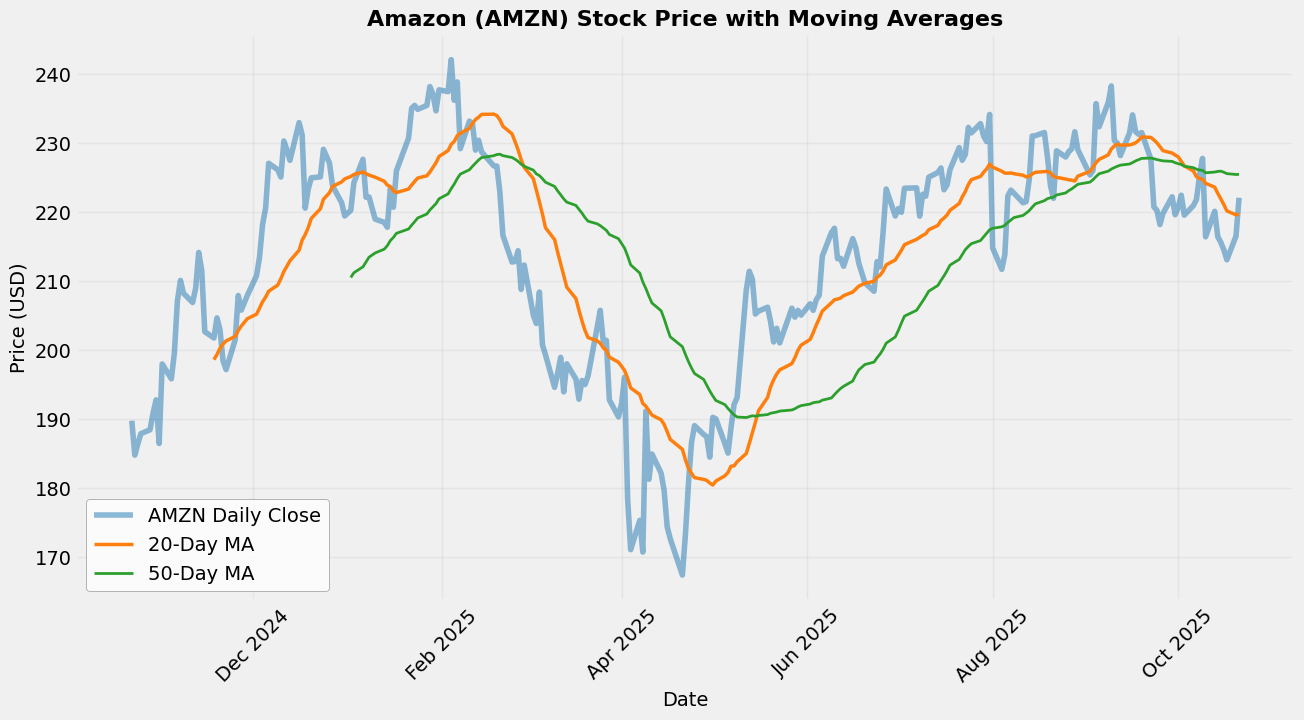

In [6]:
from strands import Agent
from strands_tools import python_repl
import os

os.environ["PYTHON_REPL_INTERACTIVE"] = "False"

agent = Agent(
    model=model,
    tools=[python_repl]
)

prompt = """
Write a Python script using the pandas library that performs the following tasks:

- Create a sample DataFrame with the columns: 'Name', 'Age', and 'Salary'.
- Add a new column named 'Bonus' that is 10% of the corresponding 'Salary' value.
- Filter the DataFrame to include only rows where the 'Age' is greater than 30.
- Group the data by age brackets (e.g., 20s, 30s, 40s) and calculate the average 'Salary' and 'Bonus' for each group.

Execute the python script and show the output.

Requirements:
- Include clear inline comments to explain the logic.
- Add a docstring for the function, describing its purpose, parameters, and return value.
- Provide an example of how to use the function.
- List any external libraries that need to be installed with pip (if any).
- Include brief documentation describing how the code works and how to run it.
"""

response = agent(prompt)

# Use Case 5: MCP Integration - Amazon Location Service example
Please refer:
* https://awslabs.github.io/mcp/
* https://github.com/awslabs/mcp

In [7]:
from mcp import StdioServerParameters, stdio_client
from strands import Agent
import boto3
from strands.models import BedrockModel
from strands.tools.mcp import MCPClient
from IPython.display import Image, display # Import for displaying images
from strands_tools import file_write
import os # To check if the file exists
# It's good practice to import AgentResult if you know that's what's returned
# from strands.types import AgentResult # Or wherever it's defined in your strands version

aws_priting_client = MCPClient(
    lambda: stdio_client(
        StdioServerParameters(
            command="uvx",
            args=["awslabs.aws-documentation-mcp-server@latest"],
            env={
              "FASTMCP_LOG_LEVEL": "ERROR"
            }
        )
    )
)


SYSTEM_PROMPT = """
You are an AWS solution architect. Answer the customer's questions based on the most updated AWS documentations.
Find a reference architecture available and provide the URLs for reference.
Generate a Markdown document with visualizations as needed.
"""

In [8]:
with aws_priting_client:
    all_tools = aws_priting_client.list_tools_sync()
    agent = Agent(tools=all_tools, model=model, system_prompt=SYSTEM_PROMPT)

    query = """"I want to build data ingestion process with following requirements:
    - The source data is a network file server.
    - Data need to be loaded into S3 datalake on daily basis.
    - Users should be able to query the data as soon as it is loaded to S3.
    Recommend a solution using AWS services.
    """

    # The agent() call returns an AgentResult object directly
    agent_result = agent(query)

I'll help you design a data ingestion process that meets your requirements. Let's search for AWS documentation on data ingestion from on-premises sources to S3 and the ability to query data in S3.
Tool #1: search_documentation
Let's look at the whitepaper on data ingestion methods for data lakes:
Tool #2: read_documentation
Let's continue reading the data ingestion methods:
Tool #3: read_documentation

Tool #4: read_documentation
Now, let's look at information about querying data directly from S3:
Tool #5: search_documentation

Tool #6: search_documentation
Let's read more about querying S3 data with Athena:
Tool #7: read_documentation

Tool #8: search_documentation

Tool #9: read_documentation

Tool #10: read_documentation
# AWS Data Ingestion Solution: Network File Server to S3 Data Lake

## Executive Summary

This document outlines an AWS solution for ingesting data from a network file server into an Amazon S3 data lake on a daily basis, with the ability for users to query the data 

# Use Case 6: Integration to Bedrock Knowledge Base
### Querying Enterprise Knowledge Bases with AI Agents

Knowledge base querying allows AI agents to retrieve relevant information from your organization's private data repositories using semantic search, enabling them to provide accurate, context-aware responses based on your specific business content. This capability transforms agents from generic assistants into specialized enterprise tools that can access internal documentation, policies, and domain-specific knowledge to deliver more relevant and actionable insights. By connecting agents to enterprise data sources, organizations can ensure AI responses are grounded in their own authoritative information rather than relying solely on public training data.



In [9]:
# Case 1: If you are running this in AWS provided workshop account with instructor's guide:

import boto3
ssm = boto3.client("ssm")
account_id = boto3.client("sts").get_caller_identity()["Account"]
region = boto3.Session().region_name

kb_id = ssm.get_parameter(Name=f"/{account_id}-{region}/kb/knowledge-base-id")[
    "Parameter"]["Value"]
ds_id = ssm.get_parameter(Name=f"/{account_id}-{region}/kb/data-source-id")[
    "Parameter"]["Value"]

# Case 2: Use your own knowledge base ID
# kb_id = "<YOUR-KNOOWLEDGE-BASE-ID>"
# ds_id = "<YOUR-DATA-SOURCE-ID>"

 **Please skip the next cell if you do not need to sync your knowledge base**

In [10]:
# RUN THIS CELL ONLY WHEN YOUR KNOWLEDGE BASE IS OUT OF SYNC

import time
# Start sync job
bedrock = boto3.client("bedrock-agent")
response = bedrock.start_ingestion_job(
    knowledgeBaseId=kb_id, dataSourceId=ds_id, description="Quick sync"
)

job_id = response["ingestionJob"]["ingestionJobId"]
print("Bedrock knowledge base sync job started, ingesting the data files from s3")

# Monitor until complete
while True:
    job = bedrock.get_ingestion_job(
        knowledgeBaseId=kb_id, dataSourceId=ds_id, ingestionJobId=job_id
    )["ingestionJob"]

    status = job["status"]

    if status in ["COMPLETE", "FAILED"]:
        break

    time.sleep(10)

# Print final result
if status == "COMPLETE":
    print("COMPLETED")
else:
    print(f"Bedrock knowledge base sync job failed with status: {status}")

Bedrock knowledge base sync job started, ingesting the data files from s3
COMPLETED


#### Query

In [11]:
from strands import Agent
from strands.models import BedrockModel
from strands_tools import retrieve

os.environ["KNOWLEDGE_BASE_ID"] = kb_id
    
# Create agent with the retrieve tool
agent = Agent(
    tools=[retrieve],
    model=model,
    system_prompt=f"""You are a knowledgeable assistant that can search and retrieve information 
    from a knowledge base to answer questions. When users ask questions, use the retrieve tool 
    to search the knowledge base for relevant information and provide comprehensive 
    answers based on the retrieved content. Always cite your sources when possible.
    Anser based on the documents you find only, do not answer using your own knowledge. """
)

In [12]:
# Change the query content accordingly to your knowledge base
query = "My phone was 20% charged when I turned it on for the first time. Is this a problem?"


# Use Case 7: Multi-agent scenario

## Financial Advisory System with AWS Bedrock Models

Let us create a financial advisory service which uses three specialized AI agents, each 
optimized with specific LLM models, tools, and prompts to address different 
customer financial needs effectively.
<br/><br/><br/>
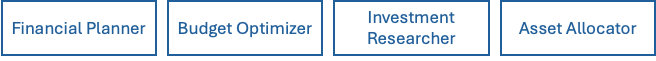
<br/>
Strands Agents provides multiple options to orchstrate these specialized agents.

In [13]:
# Create specialized agents

from strands import Agent, tool
from strands.models.bedrock import BedrockModel

# Investment Research Assistant
model_research = BedrockModel(model_id="us.amazon.nova-pro-v1:0")
investment_researcher = Agent(
    name="investment_researcher",
    model=model_research,
    system_prompt="""
    You are a financial research analyst who helps users explore various investment opportunities. 
    You specialize in providing insights into stocks, ETFs, mutual funds, bonds, and other instruments.
    You also highlight key market trends, risk factors, and historical performance.
    Your goal is to equip users with comprehensive, objective information to support their investment decisions.
    """,
)


# Budget Optimizer Assistant
model_budget = BedrockModel(model_id="us.amazon.nova-lite-v1:0")
budget_optimizer = Agent(
    name="budget_optimizer",
    model=model_budget,
    system_prompt="""
    You are a smart budgeting assistant who helps users manage and optimize their monthly expenses.
    You analyze income, spending patterns, and savings goals, and suggest personalized recommendations 
    to cut unnecessary costs and improve savings. Your goal is to help users maintain a healthy financial balance.
    """,
)


# Financial Planner Assistant
model_planner = BedrockModel(model_id="us.amazon.nova-micro-v1:0")
financial_planner = Agent(
    name="financial_planner",
    model=model_planner,
    system_prompt="""
    You are a certified financial advisor bot who helps users create customized financial plans 
    based on their goals, income, age, and risk tolerance. 
    You guide them through budgeting, saving, debt management, insurance, and retirement planning.
    Your goal is to provide practical, step-by-step advice to help users achieve financial stability and growth.
    """,
)

# Asset Allocator
model_allocator = BedrockModel(model_id="us.anthropic.claude-3-5-haiku-20241022-v1:0")
asset_allocator = Agent(
    name="asset_allocator",
    model=model_allocator,
    system_prompt="""
    You are an asset allocator. Based on the financial needs of the users,
    advise optimized asset allocation strategies.
    """,
)

#### Agents as Tools

"Agents as Tools" is an architectural pattern in AI systems where specialized AI agents are wrapped as callable functions (tools) that can be used by other agents. This creates a hierarchical structure where:
<br/>
1. **A primary "orchestrator" agent** handles user interaction and determines which specialized agent to call
2. **Specialized "tool agents"** perform domain-specific tasks when called by the orchestrator
<br/>This approach mimics human team dynamics, where a manager coordinates specialists, each bringing unique expertise to solve complex problems. Rather than a single agent trying to handle everything, tasks are delegated to the most appropriate specialized agent.
<br/><br/>
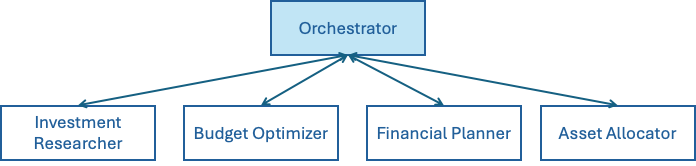



In [14]:
# Use agents as tools
from strands import Agent

# Define orchestrator system prompt with clear tool selection guidance
MAIN_SYSTEM_PROMPT = """
You are a manager who works with specialized agents, who helps customers to set up their financial plans.
Use followings tools:
* financial_planner_assistant: Analyze the customer's needs and define financial goals.
* asset_allocator_assistant: Find out suggested asset allocation strategy.
* budget_optimizer_assistant: Optimize customer's spending and savings.
* investment_researcher_assistant: Recommend investable assets for the customer.
Always select the most appropriate tool based on the user's query.
"""

# Make the agents as tools.
@tool
def investment_researcher_assistant(query: str) -> str:
    return investment_researcher(query).message

@tool
def budget_optimizer_assistant(query: str) -> str:
    return budget_optimizer(query).message

@tool
def financial_planner_assistant(query: str) -> str:
    return financial_planner(query).message


@tool
def asset_allocator_assistant(query: str) -> str:
    return asset_allocator(query).message

# Strands Agents SDK allows easy integration of agent tools
orchestrator = Agent(name = "orchestrator",
                     model=model,
                     system_prompt=MAIN_SYSTEM_PROMPT,
                     tools=[investment_researcher_assistant,
                            budget_optimizer_assistant,
                            financial_planner_assistant,
                            asset_allocator_assistant])

orchestrator(
    """
    I'm 30 years old, earning around $6,000 per month. 
    I have some student loans and moderate savings.
    I want to understand how I can better manage my monthly budget, 
    explore investment options, and build a solid long-term financial plan 
    for buying a house and retiring early. Can you help?
    """
)

I'd be happy to help you build a comprehensive financial plan! As a 30-year-old earning $6,000 monthly with student loans and moderate savings, you have several financial aspects to address - budgeting, investments, and long-term planning for home ownership and early retirement.

Let me help by consulting our specialized tools to provide you with tailored guidance. First, let's look at optimizing your monthly budget.
Tool #1: budget_optimizer_assistant
Great to hear that you're taking steps to manage your finances better! Here’s a structured approach to help you optimize your monthly budget:

### Step 1: Analyze Your Income and Expenses

1. **Income:**
   - Monthly Income: $6,000

2. **Fixed Expenses:**
   - Rent/Mortgage: $1,500
   - Utilities (electricity, water, internet): $200
   - Student Loan Payments: $300
   - Car Payment/Insurance: $300
   - Health Insurance: $150

3. **Variable Expenses:**
   - Groceries: $300
   - Dining Out/Entertainment: $200
   - Transportation (fuel, pub

AgentResult(stop_reason='end_turn', message={'role': 'assistant', 'content': [{'text': "## Your Personalized Financial Plan Summary\n\nBased on the detailed analysis from our specialized tools, here's a comprehensive financial strategy to help you manage your budget, invest wisely, and achieve your goals of buying a house and retiring early:\n\n### 1. Monthly Budget Optimization\n- From your $6,000 monthly income, your current expenses of approximately $3,900 can be reduced to around $3,700 with some minor adjustments\n- This gives you about $2,300 monthly to allocate toward your financial goals\n- Consider automating savings and using budgeting apps to track expenses\n- Review your student loans for refinancing opportunities\n\n### 2. Recommended Asset Allocation\n- **Emergency Fund (20%)**: $12,000-$18,000 in high-yield savings accounts\n- **Retirement Investments (40-50%)**:\n  * Focus on 401(k) with employer match\n  * Supplement with Roth IRA contributions\n  * Invest in low-cost 

#### Swarm Multi-agent Pattern

A Swarm is a collaborative agent orchestration system where multiple agents work together as a team to solve complex tasks. Unlike traditional sequential or hierarchical multi-agent systems, a Swarm enables autonomous coordination between agents with shared context and working memory.


* **Self-organizing agent teams** with shared working memory
* **Tool-based coordination** between agents
* **Autonomous agent collaboration** without central control
* **Dynamic task distribution** based on agent capabilities
* **Collective intelligence** through shared context
* **Multi-modal input support** for handling text, images, and other content types
<br/>

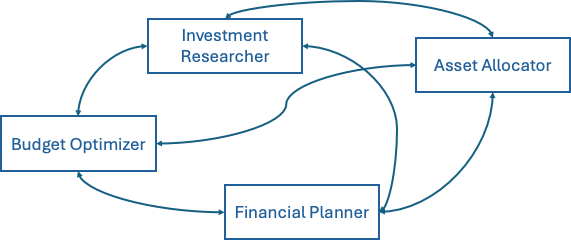


In [15]:
from strands.multiagent import Swarm

financial_planner_swarm = Swarm(
    [investment_researcher, budget_optimizer, financial_planner, asset_allocator],
    max_handoffs=20,
    max_iterations=20,
    execution_timeout=900.0,  # 15 minutes
    node_timeout=300.0,       # 5 minutes per agent
    repetitive_handoff_detection_window=8,  # There must be >= 3 unique agents in the last 8 handoffs
    repetitive_handoff_min_unique_agents=4
)


In [16]:
result = financial_planner_swarm(
"""
    I'm 30 years old, earning around $6,000 per month. 
    I have some student loans and moderate savings.
    I want to understand how I can better manage my monthly budget, 
    explore investment options, and build a solid long-term financial plan 
    for buying a house and retiring early. Can you help?
"""
)

# Access the final result
print(f"Status: {result.status}")
print(f"Node history: {[node.node_id for node in result.node_history]}")

<thinking> 
To effectively address the user's request, I need to break down the tasks into manageable parts and hand them off to the appropriate agents. Here’s the plan:

1. **Budget Optimization**: The user needs help managing their monthly budget. This task is best suited for the `budget_optimizer` agent.
2. **Financial Planning**: The user wants to build a solid long-term financial plan, including buying a house and retiring early. This task should be handled by the `financial_planner` agent.
3. **Asset Allocation**: The user is interested in exploring investment options. The `asset_allocator` agent can provide guidance on how to allocate assets for long-term growth.

I will hand off these tasks to the respective agents.
</thinking>


Tool #1: handoff_to_agent

Tool #2: handoff_to_agent

Tool #3: handoff_to_agent
The tasks have been successfully handed off to the appropriate agents:

1. **Budget Optimization**: The `budget_optimizer` agent will help you manage your monthly budget.
2

#### Graph Multi-agent pattern

A Graph is a deterministic Directed Acyclic Graph (DAG) based agent orchestration system where agents or other multi-agent systems (like Swarm or nested Graphs) are nodes in a graph. Nodes are executed according to edge dependencies, with output from one node passed as input to connected nodes.

* **Deterministic execution order** based on DAG structure
* **Output propagation** along edges between nodes
* **Clear dependency management** between agents
* **Supports nested patterns** (Graph as a node in another Graph)
* **Conditional edge traversal** for dynamic workflows
* **Multi-modal input support** for handling text, images, and other content types

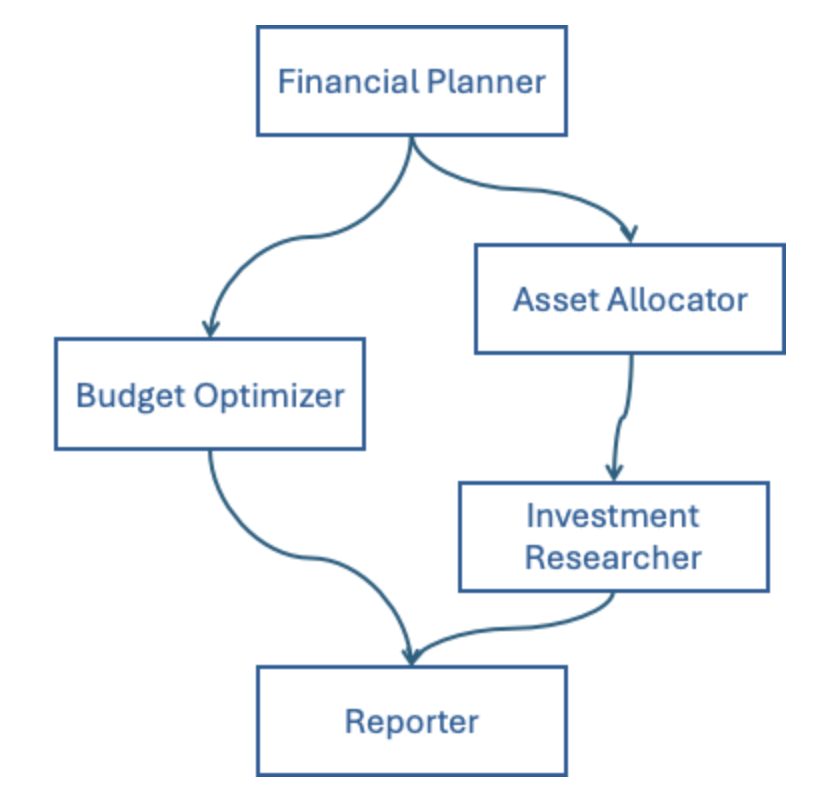

In [17]:
from strands.multiagent import GraphBuilder

# Additional agent for reporting
reporter = Agent(model=model, system_prompt="Create a financial planning report based on the input.")

# Build the graph
builder = GraphBuilder()

# Add nodes
builder.add_node(financial_planner, "financial_planner")
builder.add_node(investment_researcher, "investment_researcher")
builder.add_node(budget_optimizer, "budget_optimizer")
builder.add_node(asset_allocator, "asset_allocator")
builder.add_node(reporter, "reporter")

# Add edges (dependencies)
builder.add_edge("financial_planner", "asset_allocator")
builder.add_edge("financial_planner", "budget_optimizer")
builder.add_edge("asset_allocator", "investment_researcher")
builder.add_edge("budget_optimizer", "reporter")
builder.add_edge("investment_researcher", "reporter")

# Set entry points (optional - will be auto-detected if not specified)
builder.set_entry_point("financial_planner")

# Build the graph
graph = builder.build()

# Execute the graph on a task
result = graph(
"""
    I'm 30 years old, earning around $6,000 per month.
    I have some student loans and moderate savings.
    I want to understand how I can better manage my monthly budget,
    explore investment options, and build a solid long-term financial plan
    for buying a house and retiring early. Can you help?
"""
)

# Access the results
print(f"\nStatus: {result.status}")
print(f"Execution order: {[node.node_id for node in result.execution_order]}")

Certainly, let's create a detailed financial plan tailored to your goals and situation. Here's a step-by-step approach to help you manage your budget, explore investment options, and plan for a house purchase and early retirement.

### 1. Monthly Budget Management

**Income:**
- Monthly income: $6,000

**Expenses:**
- List all monthly expenses. Prioritize fixed expenses (rent, utilities, loan payments) and variable expenses (groceries, entertainment).
- Aim to keep fixed expenses below 50% of your income and variable expenses below 30%. The remaining 20% should go towards savings and debt repayment.

**Savings Allocation:**
- Emergency Fund: Aim to save 3-6 months’ worth of living expenses.
- House Down Payment: Save at least 20% of the home’s purchase price.
- Retirement Savings: Contribute to your 401(k) and IRA, aiming for at least 15-20% of your income.

### 2. Investment Strategy

**Short-Term Savings:**
- High-Yield Savings Account or Money Market Account: For emergency funds and